In [1]:
## Loading the required libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
## Loading the dataset
df = pd.read_csv("D:\Data Projects\Practice Files\sales_data_sample.csv", sep = ",", encoding = "Latin-1")

In [3]:
## Exploring the dataset

df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


In [4]:
df.tail(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [5]:
df.shape

(2823, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [8]:
## Cleaning the dataset

## dropping non-relevant columns

df1 = df.drop(columns = ["ORDERNUMBER", "ORDERDATE", "ORDERLINENUMBER", "ADDRESSLINE1", "ADDRESSLINE2", "STATE","POSTALCODE",
                        "CONTACTLASTNAME", "CONTACTFIRSTNAME", "PRODUCTCODE", "CUSTOMERNAME", "PHONE", "CITY"])

In [9]:
## checking for any null values and dealing with them

df1.isna().sum()

QUANTITYORDERED       0
PRICEEACH             0
SALES                 0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
COUNTRY               0
TERRITORY          1074
DEALSIZE              0
dtype: int64

In [10]:
df1["TERRITORY"].fillna(method="ffill")

0        NaN
1       EMEA
2       EMEA
3       EMEA
4       EMEA
        ... 
2818    EMEA
2819    EMEA
2820    EMEA
2821    EMEA
2822    EMEA
Name: TERRITORY, Length: 2823, dtype: object

In [11]:
df1["TERRITORY"].fillna(method="bfill")

0       EMEA
1       EMEA
2       EMEA
3       EMEA
4       EMEA
        ... 
2818    EMEA
2819    EMEA
2820    EMEA
2821    EMEA
2822     NaN
Name: TERRITORY, Length: 2823, dtype: object

In [12]:
## checking for any duplicates

df1.duplicated().sum()

0

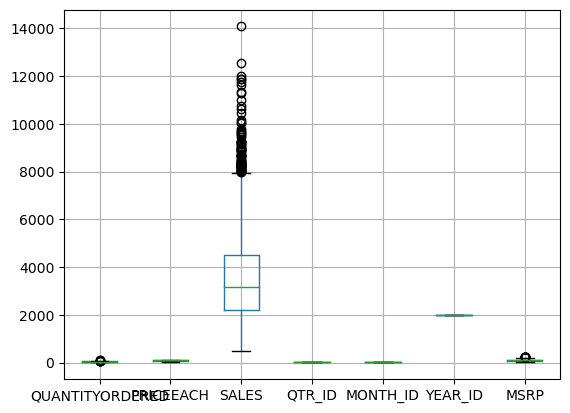

In [13]:
## dealing with outliers

df1.boxplot()
plt.show()

In [14]:
## dealing with the data in the sales columns

q1 = df1["SALES"].quantile(0.25)
q3 = df1["SALES"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df1.loc[(df1["SALES"] > upper_limit) | (df1["SALES"] < lower_limit)] # identifies the outliers

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,TERRITORY,DEALSIZE
30,45,100.0,10993.50,Shipped,3,9,2003,Classic Cars,214,Singapore,Japan,Large
32,34,100.0,8014.82,Shipped,4,11,2003,Classic Cars,214,Australia,APAC,Large
35,47,100.0,9064.89,Shipped,4,12,2003,Classic Cars,214,Canada,NaN,Large
41,34,100.0,8014.82,Shipped,3,8,2004,Classic Cars,214,Italy,EMEA,Large
43,47,100.0,10172.70,Shipped,4,10,2004,Classic Cars,214,France,EMEA,Large
...,...,...,...,...,...,...,...,...,...,...,...,...
2241,38,100.0,8844.12,Shipped,4,11,2004,Trucks and Buses,54,Norway,EMEA,Large
2295,48,100.0,8209.44,Shipped,4,11,2004,Trucks and Buses,64,USA,NaN,Large
2430,45,100.0,8977.05,Shipped,1,3,2005,Trains,58,France,EMEA,Large
2505,46,100.0,10066.60,Shipped,1,3,2005,Planes,91,USA,NaN,Large


In [15]:
df2 = df1.loc[(df1["SALES"] < upper_limit) & (df1["SALES"] > lower_limit)] # selects only values that are within the limits

## due to the small size of the dataset, I only focused on removing outliers from the sales column.

In [16]:
## identifying the number of outliers

print("Before removing outliers:", len(df1))
print("After removing outliers:", len(df2))
print("Outliers:", len(df1) - len(df2))

Before removing outliers: 2823
After removing outliers: 2742
Outliers: 81


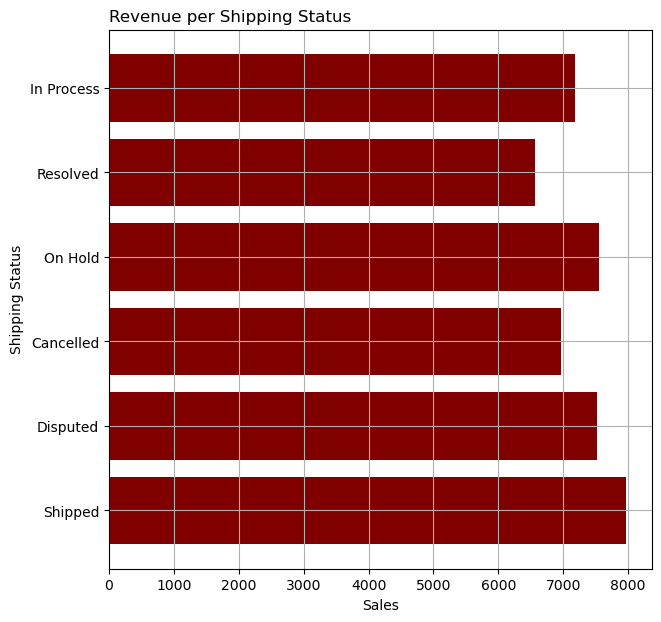

In [17]:
## Exploratory Data Analysis

## Revenue per Shipping Status
plt.figure(figsize = (7,7))
plt.barh(df2["STATUS"], df2["SALES"], color = "maroon")
plt.xlabel("Sales")
plt.ylabel("Shipping Status")
plt.grid(True)
plt.title("Revenue per Shipping Status", loc = "left")
plt.show()

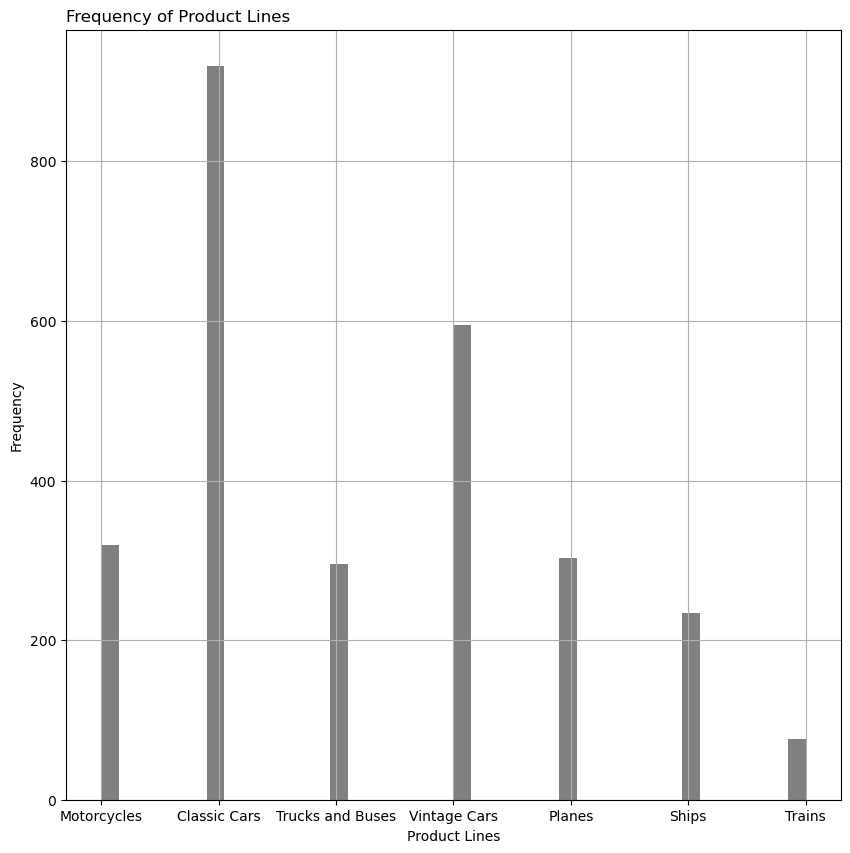

In [18]:
## The most Frequent Product Line

plt.figure(figsize = (10,10))
plt.hist(df2["PRODUCTLINE"], bins = 40, color = "grey")
plt.xlabel("Product Lines")
plt.ylabel("Frequency")
plt.grid(True)
plt.title("Frequency of Product Lines", loc = "left")
plt.show()

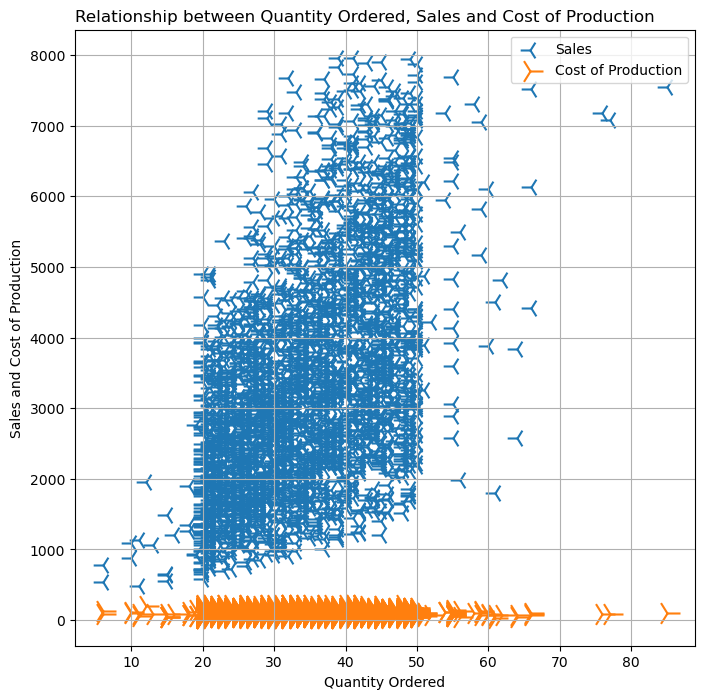

In [19]:
## Relationship between Quantity Ordered, Sales and Cost of Production

plt.figure(figsize = (8,8))
plt.scatter(df2["QUANTITYORDERED"], df2["SALES"],  s = 200, marker = "3")
plt.scatter(df2["QUANTITYORDERED"], df2["MSRP"], s = 350, marker = "4")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales and Cost of Production")
plt.grid(True)
plt.legend(["Sales", "Cost of Production"])
plt.title("Relationship between Quantity Ordered, Sales and Cost of Production", loc = "left")
plt.show()

In [20]:
## Grouping string columns

df2["STATUS"] =  df2["STATUS"].replace({
    "Shipped" : "1",
    "Disputed" : "2",
    "In Process" : "3", 
    "Cancelled" : "4", 
    "On Hold" : "5",
    "Resolved" : "6"
})

df2["DEALSIZE"] = df2["DEALSIZE"].replace({
    "Small" : "1",
    "Medium" : "2",
    "Large" : "3"
})

df2["PRODUCTLINE"] = df2["PRODUCTLINE"].replace({
    "Motorcycles" : "1",
    "Classic Cars" : "2",
    "Trucks and Buses" : "3", 
    "Vintage Cars" : "4",
    "Planes" : "5",
    "Ships" : "6", 
    "Trains" : "7"
})

C:\Users\user\AppData\Local\Temp\ipykernel_12036\1621289331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["STATUS"] =  df2["STATUS"].replace({
C:\Users\user\AppData\Local\Temp\ipykernel_12036\1621289331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["DEALSIZE"] = df2["DEALSIZE"].replace({
C:\Users\user\AppData\Local\Temp\ipykernel_12036\1621289331.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [21]:
df2

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2871.00,1,1,2,2003,1,95,USA,NaN,1
1,34,81.35,2765.90,1,2,5,2003,1,95,France,EMEA,1
2,41,94.74,3884.34,1,3,7,2003,1,95,France,EMEA,2
3,45,83.26,3746.70,1,3,8,2003,1,95,USA,NaN,2
4,49,100.00,5205.27,1,4,10,2003,1,95,USA,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,1,4,12,2004,6,54,Spain,EMEA,1
2819,29,100.00,3978.51,1,1,1,2005,6,54,Finland,EMEA,2
2820,43,100.00,5417.57,6,1,3,2005,6,54,Spain,EMEA,2
2821,34,62.24,2116.16,1,1,3,2005,6,54,France,EMEA,1


In [22]:
## dropping the territory column

df3 = df2.drop(columns = ["TERRITORY"])
df3

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,COUNTRY,DEALSIZE
0,30,95.70,2871.00,1,1,2,2003,1,95,USA,1
1,34,81.35,2765.90,1,2,5,2003,1,95,France,1
2,41,94.74,3884.34,1,3,7,2003,1,95,France,2
3,45,83.26,3746.70,1,3,8,2003,1,95,USA,2
4,49,100.00,5205.27,1,4,10,2003,1,95,USA,2
...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,1,4,12,2004,6,54,Spain,1
2819,29,100.00,3978.51,1,1,1,2005,6,54,Finland,2
2820,43,100.00,5417.57,6,1,3,2005,6,54,Spain,2
2821,34,62.24,2116.16,1,1,3,2005,6,54,France,1


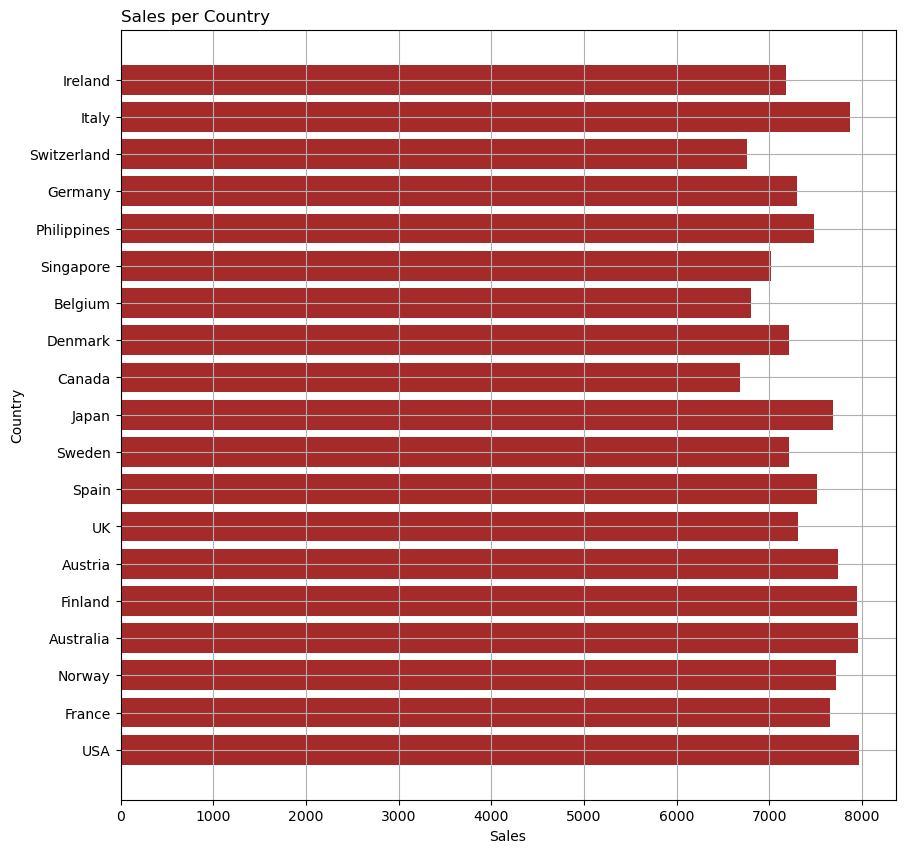

In [26]:
## Checking the Country with the highest sales

plt.figure(figsize = (10,10))
plt.barh(df3["COUNTRY"], df3["SALES"], color = "brown")
plt.xlabel("Sales")
plt.ylabel("Country")
plt.grid(True)
plt.title("Sales per Country", loc = "left")
plt.show()

In [30]:
## Checking for the correlations

revenue = df3.drop(columns = ["COUNTRY"])

correlation = pd.DataFrame(revenue.corr())
correlation

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,DEALSIZE
QUANTITYORDERED,1.000000,-0.029011,0.517301,0.054932,-0.027896,-0.028857,0.045528,0.009504,-0.042267,0.433840
PRICEEACH,-0.029011,1.000000,0.700392,-0.011764,0.011885,0.008764,-0.012863,-0.098376,0.677596,0.634384
SALES,0.517301,0.700392,1.000000,-0.006805,0.005625,0.005167,0.005234,-0.159336,0.627990,0.843019
STATUS,0.054932,-0.011764,-0.006805,1.000000,-0.107292,-0.108363,0.240201,0.132379,-0.033685,0.021460
QTR_ID,-0.027896,0.011885,0.005625,-0.107292,1.000000,0.979367,-0.430554,-0.026069,0.011863,-0.004485
MONTH_ID,-0.028857,0.008764,0.005167,-0.108363,0.979367,1.000000,-0.426282,-0.017458,0.011229,-0.003875
YEAR_ID,0.045528,-0.012863,0.005234,0.240201,-0.430554,-0.426282,1.000000,0.014581,-0.011490,-0.004798
PRODUCTLINE,0.009504,-0.098376,-0.159336,0.132379,-0.026069,-0.017458,0.014581,1.000000,-0.257197,-0.139625
MSRP,-0.042267,0.677596,0.627990,-0.033685,0.011863,0.011229,-0.011490,-0.257197,1.000000,0.550566
DEALSIZE,0.433840,0.634384,0.843019,0.021460,-0.004485,-0.003875,-0.004798,-0.139625,0.550566,1.000000


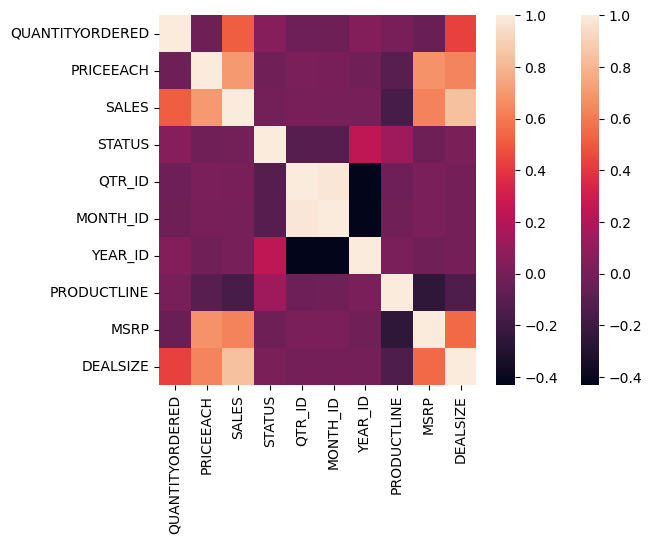

In [32]:
sns.heatmap(correlation)
plt.show()

In [58]:
## Building the Prediction  model to predict the dealsize

#importing the ecessary sublibraries and functions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score

In [52]:
## defining the dependent and independent variables

X = revenue.drop(columns = ["DEALSIZE"])
y = revenue["DEALSIZE"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [54]:
log_reg = LogisticRegression()

In [55]:
## fitting the model

model = log_reg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# predicting the outcome

pred = log_reg.predict(X_test)

In [57]:
pred

array(['1', '1', '1', '2', '2', '1', '1', '1', '1', '2', '1', '2', '2',
       '2', '1', '1', '1', '2', '2', '2', '2', '2', '2', '1', '1', '1',
       '1', '1', '2', '1', '1', '2', '1', '1', '1', '2', '1', '2', '1',
       '2', '1', '1', '2', '1', '2', '1', '1', '1', '2', '2', '2', '2',
       '2', '1', '1', '1', '1', '2', '2', '1', '2', '2', '1', '1', '1',
       '2', '3', '1', '2', '1', '1', '1', '2', '1', '2', '1', '2', '2',
       '2', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2',
       '2', '2', '1', '2', '1', '1', '1', '1', '2', '2', '1', '2', '2',
       '2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '2', '2', '1',
       '2', '2', '2', '1', '1', '2', '2', '1', '1', '2', '2', '2', '1',
       '1', '1', '2', '1', '1', '2', '1', '2', '2', '1', '2', '1', '1',
       '1', '1', '2', '1', '1', '2', '1', '2', '2', '2', '1', '2', '1',
       '2', '2', '2', '1', '1', '2', '1', '1', '2', '1', '2', '1', '2',
       '2', '2', '2', '2', '1', '1', '2', '1', '1', '2', '1', '2

In [59]:
## checking for the accuracy

accuracy_score(pred, y_test)

0.9985422740524781

In [ ]:
## The model has an accuracy score of 99% which makes it a good predictor of the dealsize.